In [2]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [3]:
#ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset=pd.read_csv('/home/hacker_bunny/Files/Projects/data_science_projects/unicorn_dataset_analysis/dataset/Unicorn_Companies.csv')
dataset.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0


In [5]:
dataset.isna().sum()

Company                0
Valuation ($B)         0
Date Joined            0
Country                0
City                   0
Industry               0
Select Inverstors     17
Founded Year          43
Total Raised          24
Financial Stage      988
Investors Count        1
Deal Terms            29
Portfolio Exits      988
dtype: int64

In [6]:
def country_vs_company_vis(data,type):
    fig = px.pie(data, 
             names='Country', 
             values=type, 
             hover_data=[type],
             title=type, 
             labels={'Country': 'Country Name'},   
             color_discrete_sequence=px.colors.qualitative.Dark24,
             hole=0.3
             )

    # Update layout
    fig.update_layout(
        title_font_size=20,  # Title font size
        title_font_family='Arial',  # Title font family
        title_x=0.5,  # Title position
        showlegend=True,  # Show legend
        legend_title='Countries',  # Legend title
        legend_font_size=12,  # Legend font size
        legend_tracegroupgap=10,  # Gap between legend items
        width=800,  # Overall width
        height=500,  # Overall height
        )
    fig.show()

In [7]:
def company_vs_valuation_vis(data,type,Range,size):
    plt.figure(figsize=size)
    sns.set_theme(context='paper',style='whitegrid',palette='Spectral')
    sns.set_color_codes('deep')
    sns.barplot(data,
                x='Company',y='Valuation',
                hue='Country',
                )
    plt.xticks(rotation=90)
    plt.yticks(Range)
    plt.xlabel('Company', fontsize=14)
    plt.ylabel('Valuation in Billion $', fontsize=14)
    plt.title(f'Distribution of {type} Valuation', fontsize=16)
    plt.tight_layout()
    plt.show()

In [8]:

cleaned_dataset=dataset.drop(columns=['Date Joined','Select Inverstors','Deal Terms','City']).rename(columns={'Valuation ($B)':'Valuation'}).fillna('Unknown')
cleaned_dataset['Valuation']=cleaned_dataset['Valuation'].str.replace("$","").astype(float)
cleaned_dataset

,Company,Valuation,Country,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
0,Bytedance,140.0,China,Artificial intelligence,2012.0,$7.44B,IPO,28.0,5.0
1,SpaceX,100.3,United States,Other,2002.0,$6.874B,Unknown,29.0,Unknown
2,Stripe,95.0,United States,Fintech,2010.0,$2.901B,Asset,39.0,1.0
3,Klarna,45.6,Sweden,Fintech,2005.0,$3.472B,Acquired,56.0,1.0
4,Epic Games,42.0,United States,Other,1991.0,$4.377B,Acquired,25.0,2.0
...,...,...,...,...,...,...,...,...,...
1032,Timescale,1.0,United States,Internet software & services,2015.0,$181.06M,Unknown,7.0,Unknown
1033,Scalapay,1.0,Italy,Fintech,2019.0,$700M,Unknown,10.0,Unknown
1034,Omada Health,1.0,United States,Health,2011.0,$449.72M,Unknown,30.0,Unknown
1035,BlueVoyant,1.0,United States,Cybersecurity,2017.0,$525.5M,Unknown,6.0,Unknown


# Now let us see which country has the most unicorn companies

In [9]:
country_count=cleaned_dataset['Country'].value_counts().reset_index().rename(columns={'count':'Number of Unicorn Companies'})
others=country_count[country_count['Number of Unicorn Companies']<7]['Number of Unicorn Companies'].sum()
new_row={'Country':'Others','Number of Unicorn Companies':int(others)}
country_count=country_count[country_count['Number of Unicorn Companies']>=7]
country_count.loc[len(country_count)]=new_row
country_count

,Country,Number of Unicorn Companies
0,United States,536
1,China,168
2,India,63
3,United Kingdom,42
4,France,24
5,Germany,24
6,Israel,20
7,Canada,19
8,Brazil,16
9,South Korea,12


In [10]:
country_vs_company_vis(country_count,'Number of Unicorn Companies')


In [11]:
cleaned_dataset['Industry'].unique()#Ai,Fintech,Cybersecurity,Data management and analytics

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank',
       'E-commerce & direct-to-consumer', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Partners, DST Global',
       'SingTel Inn

In [12]:
working_industries=['Artificial intelligence''Artificial Intelligence','Cybersecurity','Fintech']
filtered_dataset=cleaned_dataset[dataset['Industry'].isin(working_industries)]
filtered_dataset

,Company,Valuation,Country,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
2,Stripe,95.0,United States,Fintech,2010.0,$2.901B,Asset,39.0,1.0
3,Klarna,45.6,Sweden,Fintech,2005.0,$3.472B,Acquired,56.0,1.0
6,Checkout.com,40.0,United Kingdom,Fintech,2012.0,$1.83B,Unknown,15.0,Unknown
9,Revolut,33.0,United Kingdom,Fintech,2015.0,$1.716B,Unknown,31.0,Unknown
12,Chime,25.0,United States,Fintech,2013.0,$2.599B,Divestiture,24.0,1.0
...,...,...,...,...,...,...,...,...,...
1023,Esusu,1.0,United States,Fintech,2015.0,$144.43M,Unknown,25.0,Unknown
1027,Payhawk,1.0,United Kingdom,Fintech,2018.0,$236.5M,Unknown,15.0,Unknown
1030,CHEQ,1.0,United States,Cybersecurity,2014.0,$171M,Unknown,6.0,Unknown
1033,Scalapay,1.0,Italy,Fintech,2019.0,$700M,Unknown,10.0,Unknown


In [13]:
def other_row(data,company,no):
    data_country=data['Country'].value_counts().reset_index().rename(columns={'count':f'Number of {company} Unicorn Companies'})
    others=data_country[data_country[f'Number of {company} Unicorn Companies']<no][f'Number of {company} Unicorn Companies'].sum()
    new_row={'Country':'Others',f'Number of {company} Unicorn Companies':int(others)}
    data_country=data_country[data_country[f'Number of {company} Unicorn Companies']>=no]
    data_country.loc[len(data_country)]=new_row
    return data_country


# Fintech unicorn companies

In [14]:
dataset_Fintech_subset=cleaned_dataset[dataset['Industry'].isin(['Fintech'])].drop(columns=['Industry'])
dataset_Fintech_subset

,Company,Valuation,Country,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
2,Stripe,95.0,United States,2010.0,$2.901B,Asset,39.0,1.0
3,Klarna,45.6,Sweden,2005.0,$3.472B,Acquired,56.0,1.0
6,Checkout.com,40.0,United Kingdom,2012.0,$1.83B,Unknown,15.0,Unknown
9,Revolut,33.0,United Kingdom,2015.0,$1.716B,Unknown,31.0,Unknown
12,Chime,25.0,United States,2013.0,$2.599B,Divestiture,24.0,1.0
...,...,...,...,...,...,...,...,...
1004,Lydia,1.0,France,2011.0,$260.33M,Unknown,12.0,Unknown
1017,CAIS,1.0,United States,2009.0,$283M,Unknown,7.0,Unknown
1023,Esusu,1.0,United States,2015.0,$144.43M,Unknown,25.0,Unknown
1027,Payhawk,1.0,United Kingdom,2018.0,$236.5M,Unknown,15.0,Unknown


In [15]:
dataset_Fintech_subset['Country'].unique()

array(['United States', 'Sweden', 'United Kingdom', 'Germany', 'Canada',
       'India', 'South Korea', 'Netherlands', 'Brazil', 'Australia',
       'France', 'Denmark', 'Austria', 'Indonesia', 'Argentina', 'China',
       'Vietnam', 'Mexico', 'Israel', 'Nigeria', 'Philippines', 'Senegal',
       'Japan', 'Ireland', 'Thailand', 'Belgium', 'Switzerland', 'Italy'],
      dtype=object)

## Country Distribution of Fintech Unicorn Companies

In [16]:
fintech_country=other_row(dataset_Fintech_subset,'Fintech',2)
fintech_country

,Country,Number of Fintech Unicorn Companies
0,United States,108
1,United Kingdom,25
2,India,14
3,China,8
4,Brazil,5
5,France,5
6,Germany,5
7,Canada,4
8,Mexico,4
9,Netherlands,3


In [17]:
country_vs_company_vis(fintech_country,'Number of Fintech Unicorn Companies')

## Valuation Analysis of Fintech Unicorns

In [18]:
data_sorted=dataset_Fintech_subset.sort_values(by='Valuation',ascending=False).reset_index(drop=True)
fintech_valuation=data_sorted[data_sorted['Valuation']>3]
fintech_valuation=fintech_valuation.iloc[:,0:3]
fintech_valuation

,Company,Valuation,Country
0,Stripe,95.00,United States
1,Klarna,45.60,Sweden
2,Checkout.com,40.00,United Kingdom
3,Revolut,33.00,United Kingdom
4,Chime,25.00,United States
5,Ripple,15.00,United States
6,Plaid,13.40,United States
7,Brex,12.30,United States
8,Bolt,11.00,United States
9,Alchemy,10.20,United States


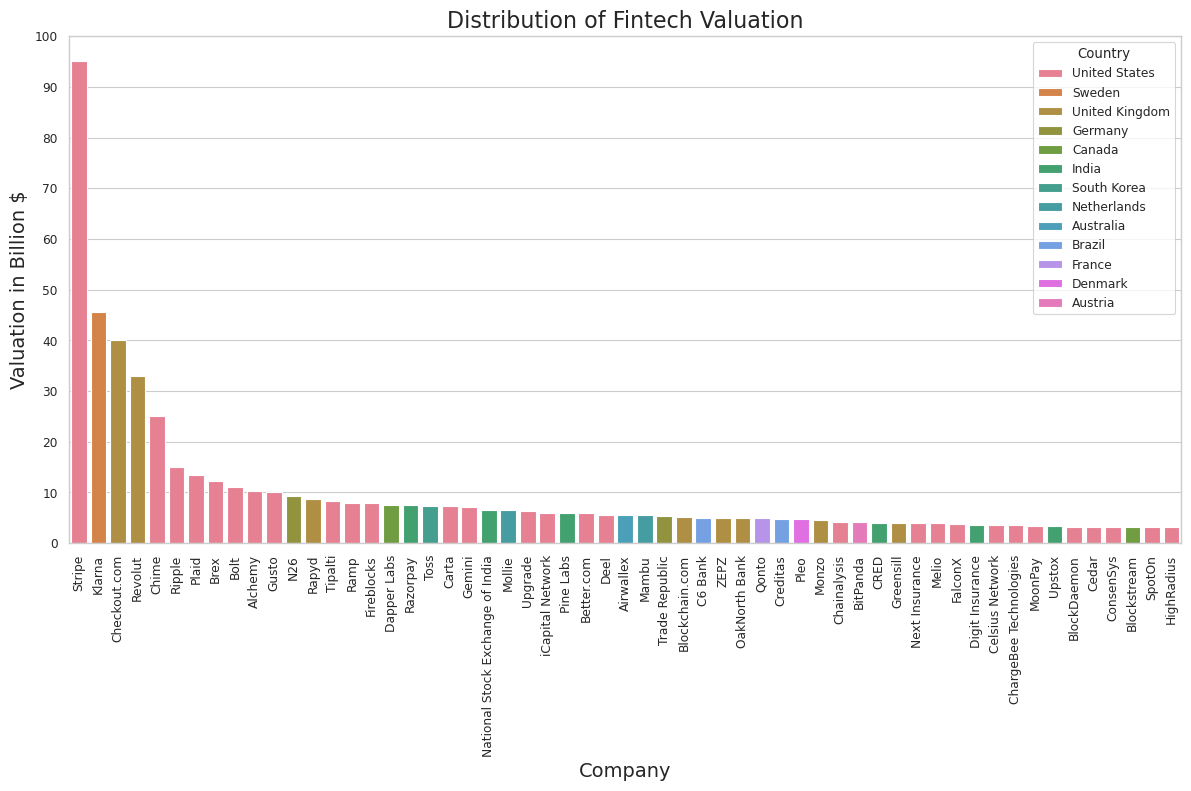

In [19]:
company_vs_valuation_vis(fintech_valuation,'Fintech',Range=range(0,101,10),size=(12,8))

### Most valued Fintech company


In [20]:
dataset_Fintech_subset.loc[(dataset_Fintech_subset['Company'] == 'Stripe') | (dataset_Fintech_subset['Company'] == 'Klarna') | (dataset_Fintech_subset['Company'] == 'Checkout.com')]

,Company,Valuation,Country,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
2,Stripe,95.0,United States,2010.0,$2.901B,Asset,39.0,1.0
3,Klarna,45.6,Sweden,2005.0,$3.472B,Acquired,56.0,1.0
6,Checkout.com,40.0,United Kingdom,2012.0,$1.83B,Unknown,15.0,Unknown


### Least valued Fintech Company 

In [21]:
data_sorted=dataset_Fintech_subset.sort_values(by='Valuation',ascending=True).reset_index(drop=True)
fintech_valuation_l=data_sorted[data_sorted['Valuation']<1.5]
fintech_valuation_l=fintech_valuation_l.iloc[:,0:3]
fintech_valuation_l

,Company,Valuation,Country
0,Scalapay,1.00,Italy
1,SmartAsset,1.00,United States
2,Vise,1.00,United States
3,Amount,1.00,United States
4,Forte Labs,1.00,United States
...,...,...,...
76,Stash,1.40,United States
77,Scalable Capital,1.40,Germany
78,Symphony,1.40,United States
79,M1 Finance,1.45,United States


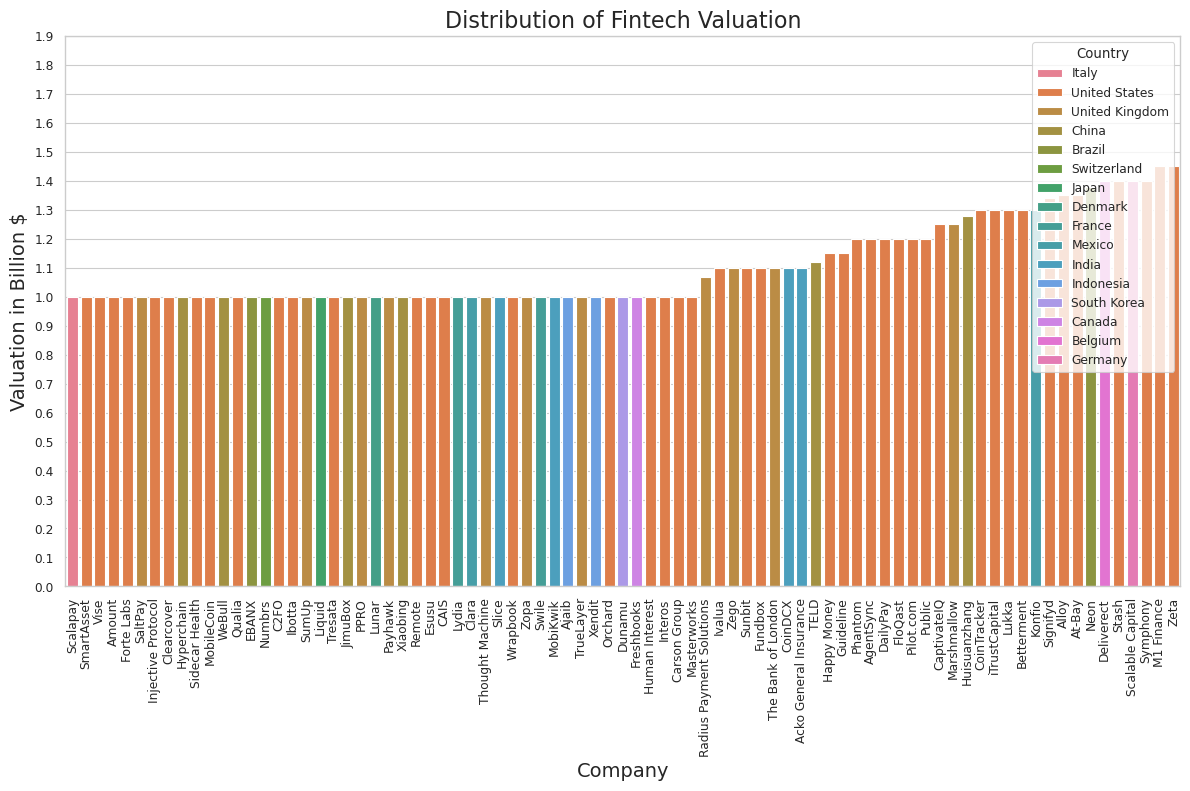

In [22]:
company_vs_valuation_vis(fintech_valuation_l,'Fintech',np.arange(0,2,0.1),(12,8))

In [23]:
l_valuation=dataset_Fintech_subset.loc[dataset_Fintech_subset['Valuation']==1]
l_valuation

,Company,Valuation,Country,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
793,JimuBox,1.0,China,Unknown,$131M,Unknown,10.0,Unknown
829,Tresata,1.0,United States,2011.0,$51.93M,Unknown,2.0,Unknown
841,Liquid,1.0,Japan,2014.0,$158M,Unknown,8.0,Unknown
848,SumUp,1.0,United Kingdom,2011.0,$1.365B,Acquired,18.0,1.0
849,Ibotta,1.0,United States,2011.0,$95.91M,Unknown,19.0,Unknown
850,C2FO,1.0,United States,2008.0,$539.68M,Unknown,14.0,Unknown
851,Numbrs,1.0,Switzerland,Unknown,$127.6M,Unknown,6.0,Unknown
852,EBANX,1.0,Brazil,2012.0,$460M,Unknown,3.0,Unknown
866,Qualia,1.0,United States,2015.0,$200.18M,Unknown,7.0,Unknown
870,PPRO,1.0,United Kingdom,2006.0,$370M,Unknown,9.0,Unknown


In [24]:
country_l_valuation=l_valuation['Country'].value_counts().reset_index().rename(columns={'count':'Least Valued Fintech Companies'})
country_vs_company_vis(country_l_valuation,'Least Valued Fintech Companies')

In [25]:
l_valuation['Founded Year'].value_counts().reset_index()

,Founded Year,count
0,Unknown,7
1,2018.0,7
2,2016.0,6
3,2015.0,5
4,2011.0,4
5,2014.0,3
6,2012.0,3
7,2020.0,2
8,2005.0,2
9,2009.0,2


In [26]:
l_valuation['Financial Stage'].unique()

array(['Unknown', 'Acquired'], dtype=object)

In [27]:
l_valuation['Investors Count'].value_counts()

Investors Count
10.0    5
9.0     5
12.0    4
8.0     4
15.0    3
14.0    3
7.0     3
17.0    3
18.0    2
6.0     2
3.0     2
30.0    1
31.0    1
1.0     1
26.0    1
5.0     1
22.0    1
19.0    1
20.0    1
2.0     1
25.0    1
Name: count, dtype: int64

# Artificial Intelligence based Unicorn Companies

In [28]:
ai=['Artificial Intelligence','Artificial intelligence']
dataset_ai_subset=cleaned_dataset[cleaned_dataset['Industry'].isin(ai)]
dataset_ai_subset['Industry']=dataset_ai_subset['Industry'].replace({'Artificial Intelligence':'AI','Artificial intelligence':'AI'})
dataset_ai_subset

,Company,Valuation,Country,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
0,Bytedance,140.00,China,AI,2012.0,$7.44B,IPO,28.0,5.0
27,Faire,12.40,United States,AI,2017.0,$1.096B,Unknown,14.0,Unknown
80,Scale AI,7.30,United States,AI,2018.0,Unknown,Unknown,1.0,Unknown
81,Argo AI,7.25,United States,AI,Unknown,$500M,Unknown,2.0,Unknown
82,Gong,7.25,United States,AI,2015.0,$583M,Unknown,13.0,Unknown
...,...,...,...,...,...,...,...,...,...
991,Owkin,1.00,United States,AI,2016.0,$254.1M,Unknown,12.0,Unknown
999,Anyscale,1.00,United States,AI,2019.0,$160.6M,Unknown,10.0,Unknown
1011,Haomao.AI,1.00,China,AI,2019.0,$203.91M,Unknown,7.0,Unknown
1018,Placer.ai,1.00,United States,AI,2016.0,$166.34M,Unknown,19.0,Unknown


## Country distribution of Artificial Intelligence based Unicorn companies

In [29]:
dataset_ai_subset['Country'].unique()

array(['China', 'United States', 'United Kingdom', 'Japan', 'Israel',
       'Bermuda', 'Chile', 'Estonia', 'Canada', 'France', 'Brazil'],
      dtype=object)

In [30]:
country_ai_count=dataset_ai_subset['Country'].value_counts().reset_index().rename(columns={'count':'Number of AI based Unicorn Companies'})
country_ai_count

,Country,Number of AI based Unicorn Companies
0,United States,43
1,China,19
2,United Kingdom,3
3,Israel,3
4,Chile,2
5,Canada,2
6,France,2
7,Japan,1
8,Bermuda,1
9,Estonia,1


In [31]:
country_vs_company_vis(country_ai_count,'Number of AI based Unicorn Companies')

## Valuation analysis of  Artificial Intelligence based Unicorns


In [32]:
dataset_ai_subset['Valuation'].unique()

array([140.  ,  12.4 ,   7.3 ,   7.25,   6.8 ,   6.3 ,   5.2 ,   5.3 ,
         5.  ,   4.6 ,   4.1 ,   4.  ,   3.5 ,   3.32,   2.92,   2.77,
         2.7 ,   2.5 ,   2.3 ,   2.2 ,   2.18,   2.17,   2.1 ,   2.  ,
         1.8 ,   1.7 ,   1.6 ,   1.5 ,   1.4 ,   1.35,   1.31,   1.3 ,
         1.2 ,   1.19,   1.15,   1.  ,   1.03])

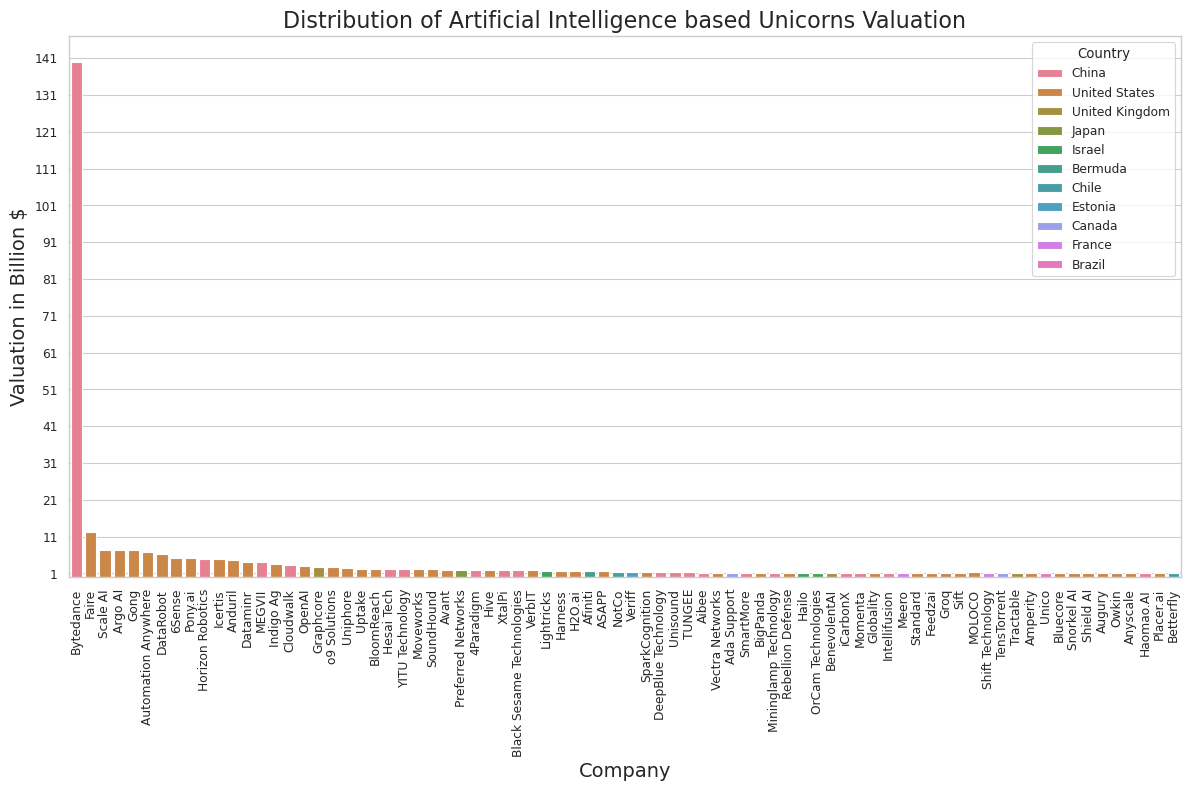

In [33]:
company_vs_valuation_vis(dataset_ai_subset,'Artificial Intelligence based Unicorns',range(1,151,10),(12,8))

### Most Valued Artificial Intelligence based Unicorns

In [34]:
most_valued_ai=dataset_ai_subset[dataset_ai_subset['Company'].isin(['Bytedance','Faire','Scale AI'])]
most_valued_ai

,Company,Valuation,Country,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
0,Bytedance,140.0,China,AI,2012.0,$7.44B,IPO,28.0,5.0
27,Faire,12.4,United States,AI,2017.0,$1.096B,Unknown,14.0,Unknown
80,Scale AI,7.3,United States,AI,2018.0,Unknown,Unknown,1.0,Unknown


### Least Valued Artificial Intelligence based Unicorns

In [35]:
low_valued_ai=dataset_ai_subset[dataset_ai_subset['Valuation'].isin([1])]
low_valued_ai

,Company,Valuation,Country,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
754,Hailo,1.0,Israel,AI,2017.0,$217M,Unknown,18.0,Unknown
794,BenevolentAI,1.0,United Kingdom,AI,2013.0,$345.55M,Unknown,7.0,Unknown
803,iCarbonX,1.0,China,AI,2015.0,$199M,Acq,3.0,3.0
830,Momenta,1.0,China,AI,2016.0,$1.283B,Unknown,28.0,Unknown
838,Globality,1.0,United States,AI,2015.0,$310.3M,Unknown,20.0,Unknown
840,Intellifusion,1.0,China,AI,2014.0,$287.85M,Unknown,36.0,Unknown
847,Meero,1.0,France,AI,2016.0,$297.5M,Unknown,10.0,Unknown
876,Standard,1.0,United States,AI,2017.0,$235.62M,Unknown,11.0,Unknown
885,Feedzai,1.0,United States,AI,2009.0,$277.8M,Unknown,10.0,Unknown
892,Groq,1.0,United States,AI,2016.0,$362.55M,Unknown,14.0,Unknown


# Cybersecurity Based Unicorn Company

In [36]:
dataset_cybersec_subset=cleaned_dataset[cleaned_dataset['Industry'].isin(['Cybersecurity'])]
dataset_cybersec_subset

,Company,Valuation,Country,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
55,Tanium,9.00,United States,Cybersecurity,2007.0,$1.17B,Unknown,15.0,Unknown
61,Snyk,8.60,United States,Cybersecurity,2015.0,$1.026B,Unknown,26.0,Unknown
64,Lacework,8.30,United States,Cybersecurity,2015.0,$1.907B,Unknown,19.0,Unknown
76,Netskope,7.50,United States,Cybersecurity,2012.0,$1.04B,Unknown,13.0,Unknown
89,1Password,6.80,Canada,Cybersecurity,2005.0,$920.14M,Unknown,30.0,Unknown
103,Wiz,6.00,Israel,Cybersecurity,2020.0,$600M,Unknown,10.0,Unknown
156,Socure,4.50,United States,Cybersecurity,2012.0,$648.25M,Unknown,22.0,Unknown
162,Arctic Wolf Networks,4.30,United States,Cybersecurity,2012.0,$498.25M,Unknown,14.0,Unknown
222,Coalition,3.50,United States,Cybersecurity,2017.0,$520M,Unknown,14.0,Unknown
269,Forter,3.00,United States,Cybersecurity,2013.0,$525M,Unknown,17.0,Unknown


## Country distribution of Cybersecurity based Unicorns

In [37]:
country_cybersec_count=dataset_cybersec_subset['Country'].value_counts().reset_index().rename(columns={'count':'Number of Cybersecurity based Unicorn Comapnies'})
country_cybersec_count

,Country,Number of Cybersecurity based Unicorn Comapnies
0,United States,38
1,Israel,6
2,Canada,3
3,Switzerland,1
4,China,1


In [38]:
country_vs_company_vis(country_cybersec_count,'Number of Cybersecurity based Unicorn Comapnies')

## Valuation Analysis of Cybersecurity based Unicorns

In [39]:
dataset_cybersec_subset['Valuation'].unique()

array([9.  , 8.6 , 8.3 , 7.5 , 6.8 , 6.  , 4.5 , 4.3 , 3.5 , 3.  , 2.75,
       2.74, 2.5 , 2.44, 2.4 , 2.  , 1.75, 1.8 , 1.7 , 1.6 , 1.5 , 1.45,
       1.4 , 1.32, 1.25, 1.2 , 1.15, 1.1 , 1.  ])

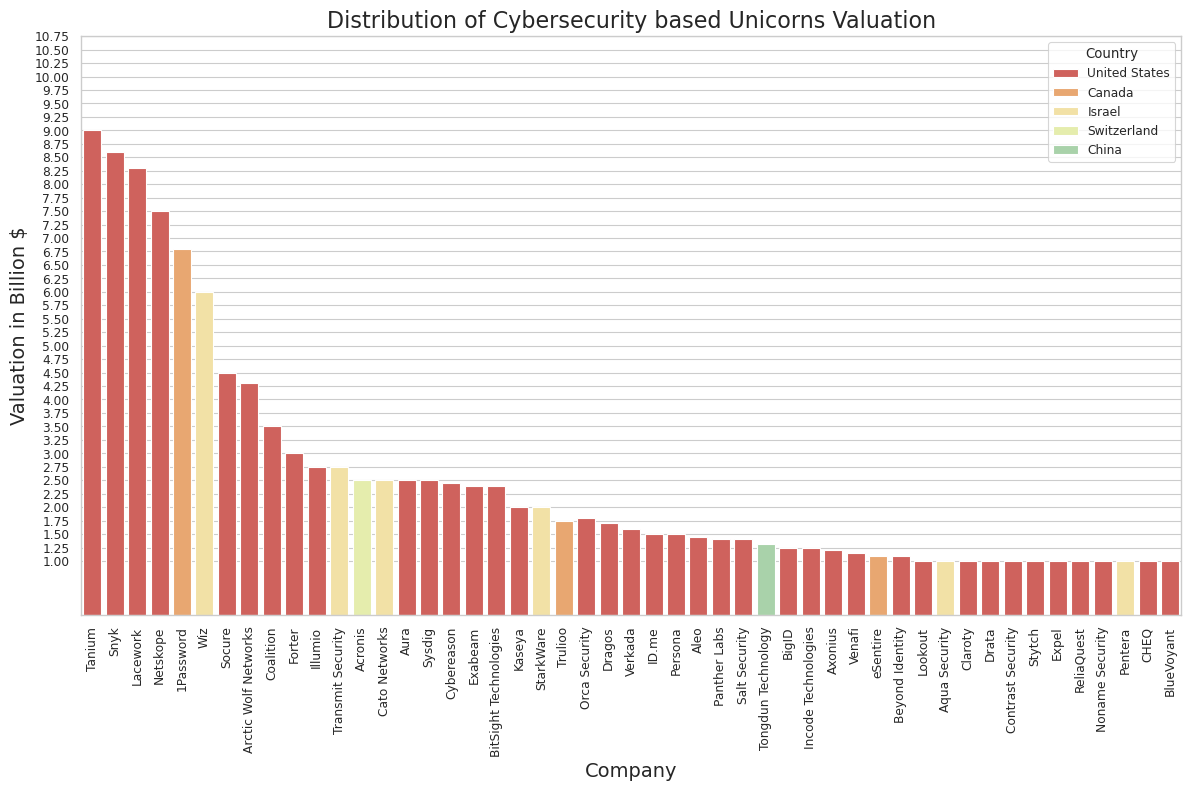

In [40]:
company_vs_valuation_vis(dataset_cybersec_subset,'Cybersecurity based Unicorns',np.arange(1,11,0.25),(12,8))

### Most Valued Cybersecurity based Unicorns

In [41]:
most_valued_cybersec=dataset_cybersec_subset[dataset_cybersec_subset['Valuation'].isin([9.  , 8.6 , 8.3 ])]
most_valued_cybersec

,Company,Valuation,Country,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
55,Tanium,9.0,United States,Cybersecurity,2007.0,$1.17B,Unknown,15.0,Unknown
61,Snyk,8.6,United States,Cybersecurity,2015.0,$1.026B,Unknown,26.0,Unknown
64,Lacework,8.3,United States,Cybersecurity,2015.0,$1.907B,Unknown,19.0,Unknown


### Least Valued Cybersecurity based Unicorns

In [48]:
low_valued_cybersec=dataset_cybersec_subset[dataset_cybersec_subset['Valuation']==1]
low_valued_cybersec

,Company,Valuation,Country,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
785,Lookout,1.0,United States,Cybersecurity,2007.0,$281M,Unknown,26.0,Unknown
881,Aqua Security,1.0,Israel,Cybersecurity,2015.0,$265M,Unknown,9.0,Unknown
919,Claroty,1.0,United States,Cybersecurity,2015.0,$632M,Unknown,22.0,Unknown
981,Drata,1.0,United States,Cybersecurity,2020.0,$128.2M,Unknown,9.0,Unknown
984,Contrast Security,1.0,United States,Cybersecurity,2014.0,$269M,Unknown,11.0,Unknown
990,Stytch,1.0,United States,Cybersecurity,Unknown,$126M,Unknown,11.0,Unknown
992,Expel,1.0,United States,Cybersecurity,2016.0,$257.8M,Unknown,11.0,Unknown
1001,ReliaQuest,1.0,United States,Cybersecurity,2007.0,$330M,Unknown,4.0,Unknown
1008,Noname Security,1.0,United States,Cybersecurity,2020.0,$220M,Unknown,7.0,Unknown
1019,Pentera,1.0,Israel,Cybersecurity,2015.0,$185M,Unknown,6.0,Unknown


# Data management & analytics based Unicorn Companies

In [42]:
dataset_data_subset=cleaned_dataset[cleaned_dataset['Industry'].isin(['Data management & analytics'])]
dataset_data_subset

,Company,Valuation,Country,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
8,Databricks,38.00,United States,Data management & analytics,2013.0,$3.497B,Unknown,29.0,Unknown
36,Celonis,11.00,Germany,Data management & analytics,2011.0,$1.368B,Unknown,13.0,Unknown
116,FiveTran,5.60,United States,Data management & analytics,2012.0,$728.02M,Unknown,8.0,Unknown
120,Collibra,5.25,Belgium,Data management & analytics,2008.0,$595.9M,Unknown,13.0,Unknown
133,SambaNova Systems,5.00,United States,Data management & analytics,2017.0,$1.132B,Unknown,10.0,Unknown
138,Cockroach Labs,5.00,United States,Data management & analytics,2015.0,$632.85M,Unknown,17.0,Unknown
169,dbt Labs,4.20,United States,Data management & analytics,2016.0,$415.9M,Unknown,12.0,Unknown
188,Rubrik,4.00,United States,Data management & analytics,2014.0,$553M,Unknown,10.0,Unknown
204,Cohesity,3.70,United States,Data management & analytics,2013.0,$660M,Unknown,22.0,Unknown
205,VAST Data,3.70,United States,Data management & analytics,2016.0,$263M,Unknown,11.0,Unknown


## Country distribution of Data management & analytics based Unicorns

In [43]:
country_data_count=dataset_data_subset['Country'].value_counts().reset_index().rename(columns={'count':'Number of Data management & analytics based Unicorn Comapnies'})
country_data_count

,Country,Number of Data management & analytics based Unicorn Comapnies
0,United States,31
1,China,2
2,Norway,2
3,Germany,1
4,Belgium,1
5,United Kingdom,1
6,Israel,1
7,Switzerland,1
8,India,1


In [44]:
country_vs_company_vis(country_data_count,'Number of Data management & analytics based Unicorn Comapnies')

## Valuation Analysis of Data management & analytics based Unicorns

In [45]:
dataset_data_subset['Valuation'].unique()

array([38.  , 11.  ,  5.6 ,  5.25,  5.  ,  4.2 ,  4.  ,  3.7 ,  3.6 ,
        3.35,  2.62,  2.15,  2.  ,  1.7 ,  1.62,  1.5 ,  1.4 ,  1.3 ,
        1.2 ,  1.15,  1.1 ,  1.05,  1.  ])

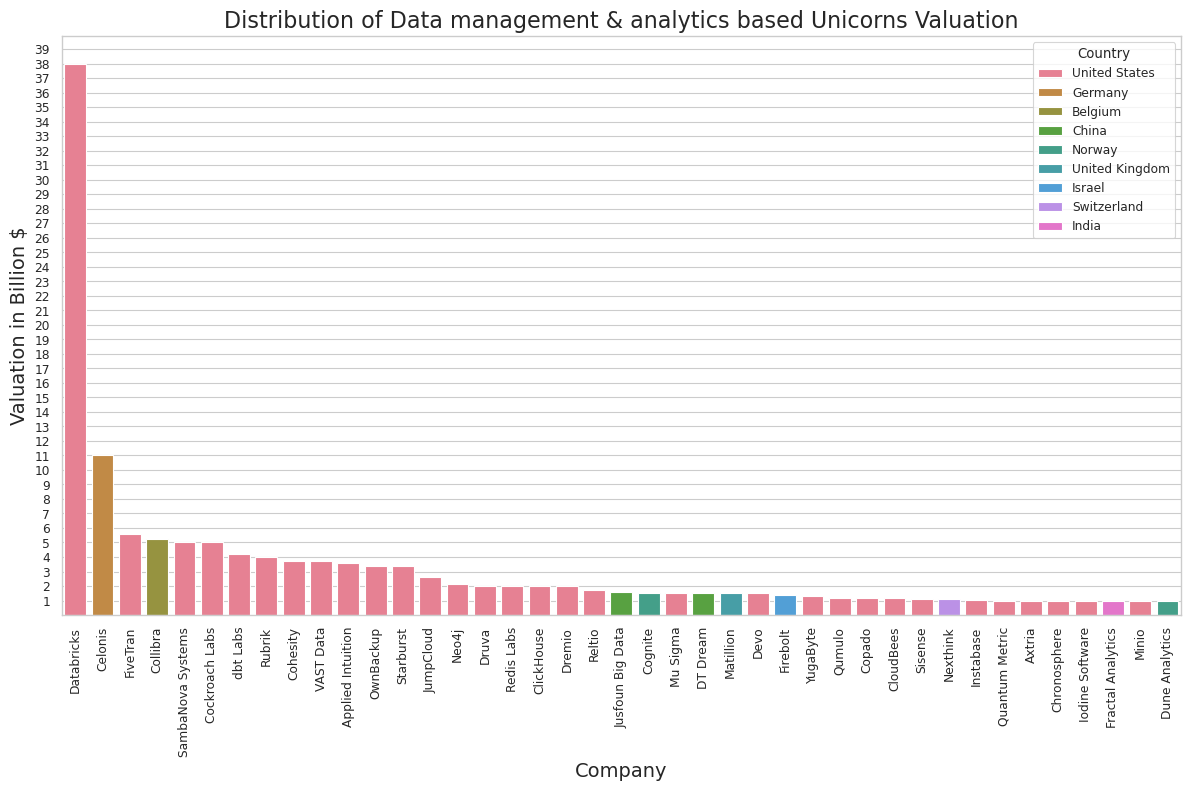

In [46]:
company_vs_valuation_vis(dataset_data_subset,'Data management & analytics based Unicorns',np.arange(1,40,1),(12,8))

### Most Valued Data management & Analytics based Unicorns

In [50]:
most_valued_data_m=dataset_data_subset[dataset_data_subset['Valuation'].isin([38.  , 11.  ,  5.6])]
most_valued_data_m

,Company,Valuation,Country,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
8,Databricks,38.0,United States,Data management & analytics,2013.0,$3.497B,Unknown,29.0,Unknown
36,Celonis,11.0,Germany,Data management & analytics,2011.0,$1.368B,Unknown,13.0,Unknown
116,FiveTran,5.6,United States,Data management & analytics,2012.0,$728.02M,Unknown,8.0,Unknown


### Least Valued Data management & Analytics based Unicorns

In [51]:
least_valued_data_m=dataset_data_subset[dataset_data_subset['Valuation']==1]
least_valued_data_m

,Company,Valuation,Country,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Portfolio Exits
867,Quantum Metric,1.0,United States,Data management & analytics,2015.0,$251M,Unknown,6.0,Unknown
907,Axtria,1.0,United States,Data management & analytics,2009.0,$206.32M,Unknown,9.0,Unknown
969,Chronosphere,1.0,United States,Data management & analytics,2019.0,$255.34M,Unknown,6.0,Unknown
1000,Iodine Software,1.0,United States,Data management & analytics,2010.0,Unknown,Unknown,3.0,Unknown
1015,Fractal Analytics,1.0,India,Data management & analytics,2000.0,$688M,Unknown,6.0,Unknown
1021,Minio,1.0,United States,Data management & analytics,2014.0,$126.3M,Unknown,13.0,Unknown
1025,Dune Analytics,1.0,Norway,Data management & analytics,2018.0,$79.42M,Unknown,12.0,Unknown
